<a href="https://colab.research.google.com/github/kirfinch/product-analytics/blob/main/RetentionFunctionHeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly.express as px
import datetime

In [ ]:
Задание 1
Retention – один из самых важных показателей в компании. 
Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока)

In [ ]:
reg_data = pd.read_csv('~/shared/problem1-reg_data.csv', sep=';', parse_dates=['reg_ts'])

In [ ]:
auth_data = pd.read_csv('~/shared/problem1-auth_data.csv', sep=';', parse_dates=['auth_ts'])

In [ ]:
reg_data.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [ ]:
reg_data.dtypes

reg_ts    object
uid        int64
dtype: object

In [ ]:
  # Изменяем тип данных для даты
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit = 's') 
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit = 's')

In [ ]:
mg_df = auth_data.merge(reg_data, on='uid')

In [ ]:
  # Убираем время из даты
mg_df['reg_ts'] = mg_df['reg_ts'].dt.strftime('%m/%d/%Y') 

In [ ]:
mg_df['auth_ts'] = mg_df['auth_ts'].dt.strftime('%m/%d/%Y')

In [ ]:
  # Возвращаем datetime
mg_df['reg_ts'] = pd.to_datetime(mg_df['reg_ts'])
mg_df['auth_ts'] = pd.to_datetime(mg_df['auth_ts'])

In [ ]:
mg_df.reg_ts.min()
mg_df.auth_ts.min()

Timestamp('1998-11-18 00:00:00')

In [ ]:
mg_df.reg_ts.max()
mg_df.auth_ts.max()

Timestamp('2020-09-23 00:00:00')

In [ ]:
mg_df.isnull().sum()

auth_ts    0
uid        0
reg_ts     0
dtype: int64

In [ ]:
mg_df.isna().sum()

auth_ts    0
uid        0
reg_ts     0
dtype: int64

In [ ]:
  # Выбираем диапазон для расчета Daily retention
mg_df = mg_df.query('"2020-09-01" <= reg_ts and reg_ts <= "2020-09-23"') 

In [ ]:
  # Считаем кол-во дней между регистрацией и заходом в игру +1 для удобства восприятия
mg_df['days_since_reg'] = (mg_df['auth_ts'] - mg_df['reg_ts']).dt.days + 1 

In [ ]:
    '''
    Функция для подсчета retention по дням.

        Параметры:
          mg_df - объединенный датафрейм

        Возвращает таблицу с показателем retention по дням.
    '''
def retention(mg_df):
    grouping = mg_df.groupby(['reg_ts', 'days_since_reg'])
    cohort = grouping['uid'].size()
    cohort = cohort.reset_index()
    cohort_counts = cohort.pivot(index='reg_ts', columns='days_since_reg', values='uid')
    
      # извлекаем дату регистрации как основу для разделения
    cohort_sizes = cohort_counts.iloc[:,0]
    
      # Считаем retantion rate пользователей для каждой когорты
    retention = cohort_counts.divide(cohort_sizes, axis=0)

    
    retention.round(3)*100
    
      # Строим график
    plt.figure(figsize=(18,14))
    plt.title('Retention Table')
    ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='YlGnBu')
    ax.set_yticklabels(retention.index)
    fig=ax.get_figure()

    plt.show()

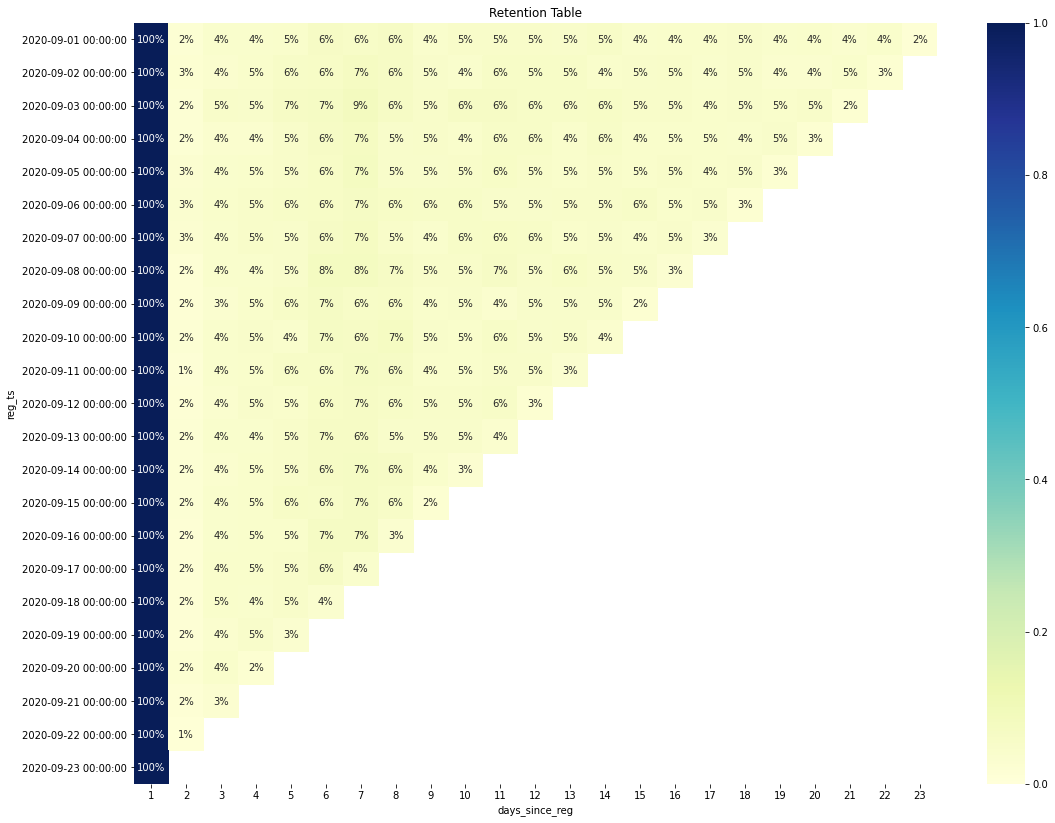

In [ ]:
retention(mg_df)

In [ ]:
#Средний 1-day retantion для игр жанра arcade составляет 30% (данные взяты с сайта ВШЭ)
#Средний 7-day-retantion  11%
#Средний 28-day-retantion 5%
#Исходя из полученных данных можно предположить что ретеншн первого дня такой низкий из-за:
#   1)В игре есть ошибка  из-за пользователь не может продолжать игру.
#   2)Для получения нового уровня или перехода на следующий уровень необходимо купить пылесос. И судя по ретеншену 7-ого дня, он кому-то нужен.
#   3)Игра слишком сложная, специфичная или просто плохая.